# Entrega data wrangling

Descripción del conjunto de datos de Kaggle S3E14:

El conjunto de datos para esta competencia (tanto el conjunto de entrenamiento como el de prueba) se generó a partir de un modelo de aprendizaje profundo entrenado en el conjunto de datos de Predicción de Rendimiento de Arándanos Silvestres. Las distribuciones de características son similares, pero no exactamente iguales, a las originales.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from itertools import product

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("playground-series-s3e14/train.csv")

df.drop('id', axis=1, inplace = True)

## Dataframe: Playground series 3 episode 14

### Predecir el rendimiento de un campo de arandanos (Regresion)

In [2]:
print("El playground series episodio 14 tiene ", len(df), " filas y ", df.shape[1], " columnas.")

El playground series episodio 14 tiene  15289  filas y  17  columnas.


Para el primer dataframe, se describen las siguientes features:

* Clonesize (m2) Tamaño promedio del clon de arándanos en el campo

* Honeybee (bees/m2/min) Densidad de abejas melíferas en el campo

* Bumbles (bees/m2/min) Densidad de abejorros en el campo

* Andrena (bees/m2/min) Densidad de abejas Andrena en el campo

* Osmia (bees/m2/min) Densidad de abejas Osmia en el campo

* MaxOfUpperTRange (℃) El registro más alto de la temperatura diaria en la banda superior durante la temporada de floración

* MinOfUpperTRange (℃) El registro más bajo de la temperatura diaria en la banda superior

* AverageOfUpperTRange (℃) El promedio de la temperatura diaria en la banda superior

* MaxOfLowerTRange (℃) El registro más alto de la temperatura diaria en la banda inferior

* MinOfLowerTRange (℃) El registro más bajo de la temperatura diaria en la banda inferior

* AverageOfLowerTRange (℃) El promedio de la temperatura diaria en la banda inferior

* RainingDays (dias) El número total de días durante la temporada de floración, en cada uno de los cuales hay precipitación mayor que cero

* AverageRainingDays (dias) El promedio de días lluviosos de toda la temporada de floración

* Fruit set: Transición de la flor a producir la fruta

* Fruit Mass: peso de un arandano promedio

* Seeds: semillas por arandano.

Considerando esto, notamos que hay 5 principales grupos de variables: tamaño del campo, variables relacionadas a densidad de especies de abejas, variables relacionadas con valores de temperatura, variables midiendo dias de lluvia y variables atribuidas directamente a parametros del fruto.

Las hipótesis que se podrían plantear van de la mano de estos grupos. Uno supondría que estas variables influyen directamente en el rendimiento de un campo por conocimiento general. 

Las abejas tienen un papel fundamental en la polinización de las flores de arándano, lo que resulta en una mayor cantidad de frutos. Su actividad de polinización asegura una mejor fertilización de los arbustos, lo que se traduce en una mayor producción de arandanos de mayor calidad, por ende mayor producción y mayor rendimiento. Por lo tanto, una mayor densidad de abejas en un campo de arándanos aumenta la eficiencia de la polinización y, en última instancia, contribuye significativamente a un rendimiento más abundante.

La temperatura del ambiente desempeña un papel crucial en el rendimiento de un campo de arándanos. Estas plantas son sensibles a las temperaturas, ya que requieren un período de frío durante el invierno para descansar y acumular energía antes de la floración. Sin suficiente frío, la producción de flores y, por lo tanto, de frutos, puede verse afectada negativamente. Además, las altas temperaturas durante la etapa de floración pueden resultar en una menor producción de frutos, lo que reduce el rendimiento. En resumen, un equilibrio adecuado en las temperaturas es esencial para un óptimo rendimiento de un campo de arándanos, influyendo en la producción de flores y frutos de alta calidad.

Por ultimo, la lluvia juega un papel vital en el rendimiento de un campo de arándanos. Estos arbustos necesitan una cantidad adecuada de agua para un crecimiento saludable y una producción abundante de frutos. La lluvia proporciona la hidratación necesaria para las plantas y ayuda a mantener un suelo húmedo, lo que es esencial durante las etapas de floración y producción de frutos. Sin embargo, es importante que la lluvia no sea excesiva, ya que el exceso de humedad puede aumentar el riesgo de enfermedades y afectar negativamente la calidad de los arándanos. En resumen, un equilibrio adecuado de lluvia es esencial para el rendimiento óptimo de un campo de arándanos, garantizando una cosecha abundante y de alta calidad.

Teniendo en cuenta esto, estas variables deberían tener cierta importancia en obtener el rendimiento del campo.

## Descipción inicial de las variables

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000
MinOfLowerTRange,15289.0,28.660553,3.195367,24.300000,27.000000,30.000000,30.000000,33.000000


In [4]:
pd.DataFrame(df.isna().sum(), columns = ["NaN counts"])

,NaN counts
clonesize,0
honeybee,0
bumbles,0
andrena,0
osmia,0
MaxOfUpperTRange,0
MinOfUpperTRange,0
AverageOfUpperTRange,0
MaxOfLowerTRange,0
MinOfLowerTRange,0


No hay valores faltantes

In [5]:
print(f'Hay {df.duplicated().sum()} filas duplicadas.')

Hay 7 filas duplicadas.


Eliminamos los duplicados.

In [6]:
df.drop_duplicates(inplace = True)

In [7]:
print(f'Quedaron {df.duplicated().sum()} filas duplicadas.')

Quedaron 0 filas duplicadas.


## Matriz triangular de correlación

Antes de realizar el análisis de correlación Spearman de las variables, voy a agregar una variable que describa la cantidad de abejas totales. Esto puede describir mejor como afectan las otras variables a la presencia total de abejas, mostrando quizas alguna correlación que no está presente con las features actuales.

In [8]:
df["total_bees"] = df.honeybee + df.bumbles + df.andrena + df.osmia

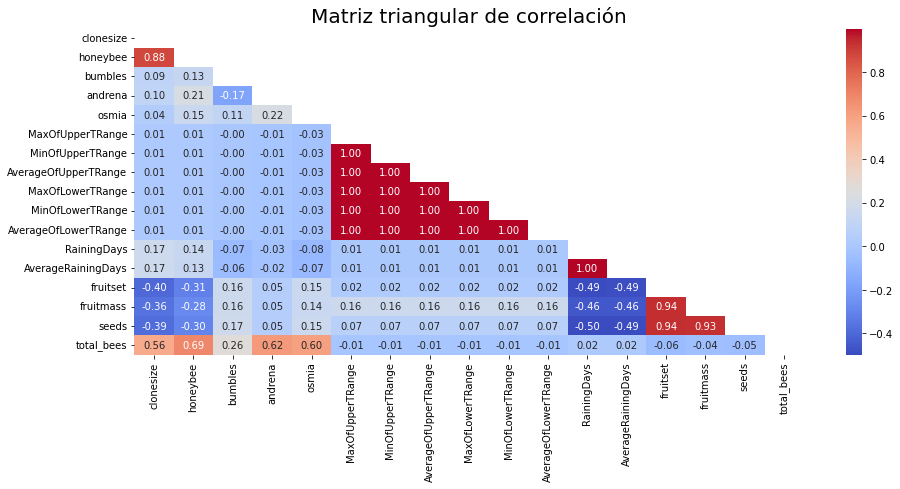

In [9]:
# Extraigo las variables utiles
variables_df = df.drop('yield', axis=1)

# Calculo la matriz de correlación
correlation_matrix = variables_df.corr(method = 'spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Ploteo
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title('Matriz triangular de correlación', size = 20)
plt.show()

La variable agregada no parece mostrar correlación con otras variables, vamos a sacarla. 

Como veo que hay un grupo de variables que estan altamente correlacionadas, vamos a analizar la distribucion de los datos de las mismas mas adelante.

In [10]:
df.drop("total_bees", axis=1,inplace = True)

In [11]:
# Uso esta funcion para extraer el numero de filas dado el numero de columnas que quiero usar para los subplots.

def get_n_rows_axes(n_features, n_cols=5, n_rows=None):
    n_rows = int(np.ceil(n_features / n_cols))
    current_col = range(1, n_cols + 1)
    current_row = range(1, n_rows + 1)
    return n_rows, list(product(current_row, current_col))

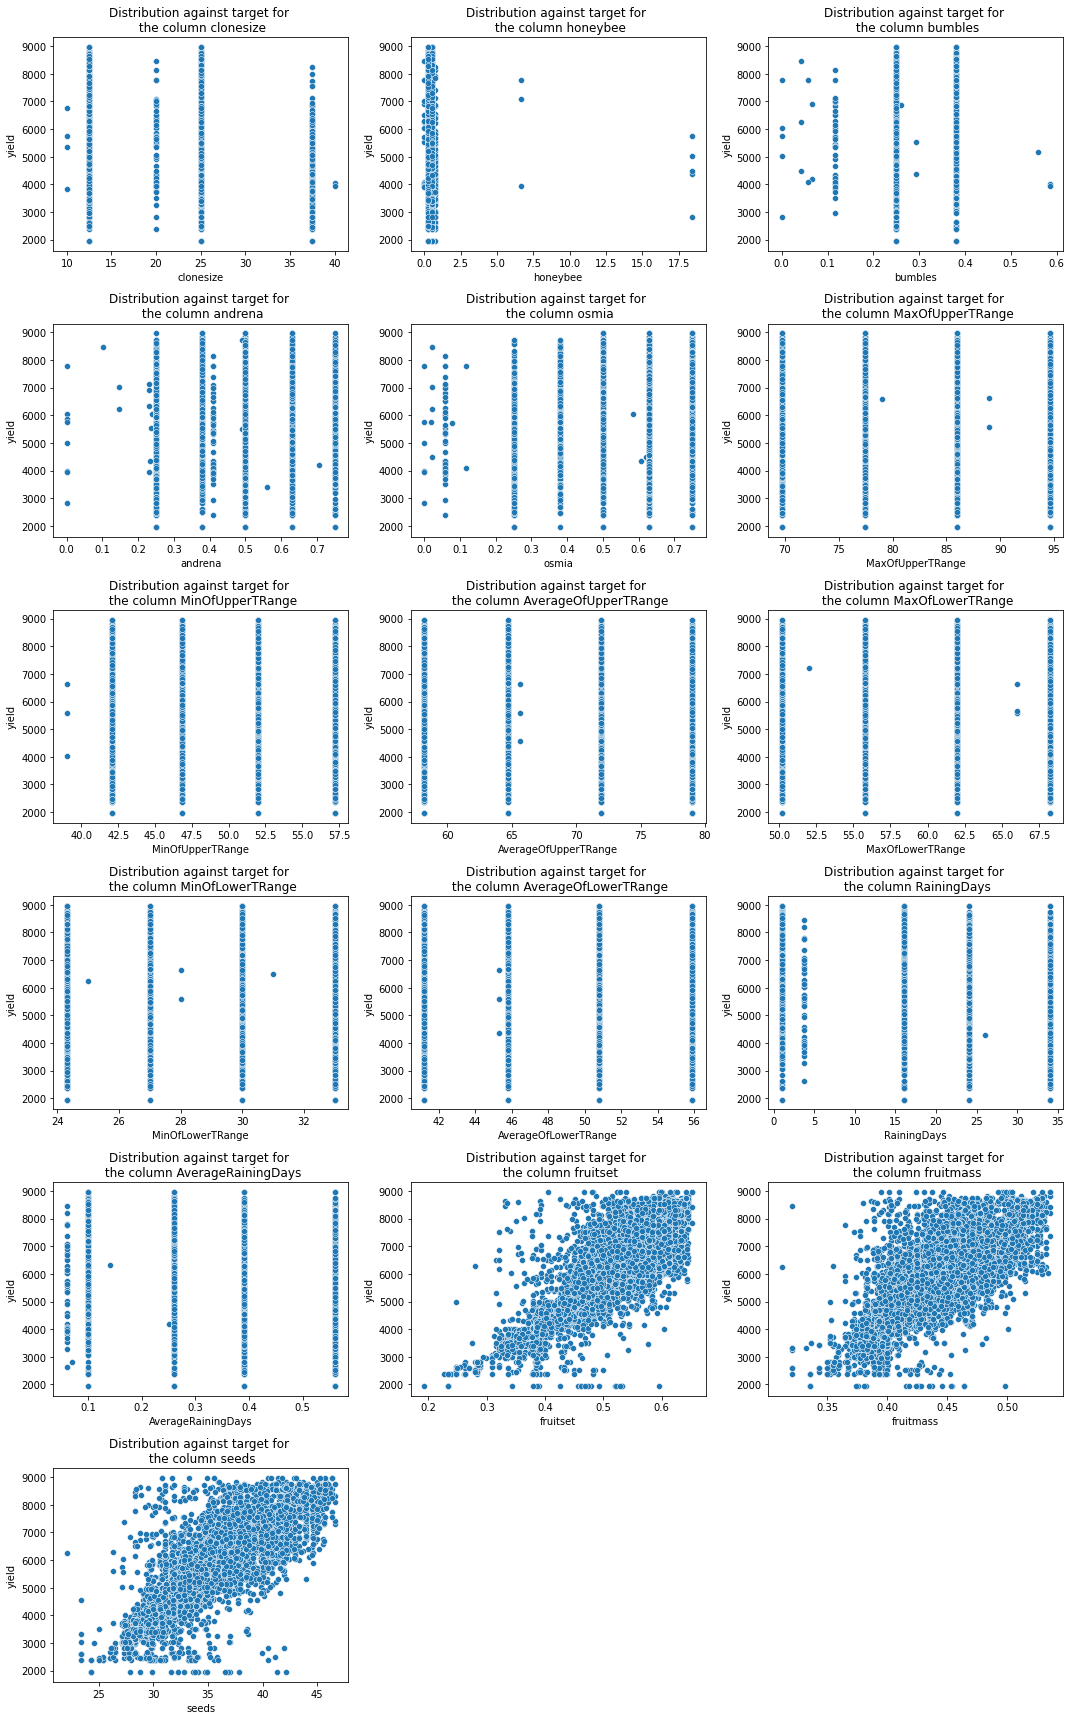

In [12]:
scatter_df = df.drop('yield', axis=1)
target = df["yield"]

n_cols = 3

n_rows, axes = get_n_rows_axes(len(scatter_df.columns), n_cols=n_cols)

plt.figure(figsize=(15, 4*n_rows))

for i, column in enumerate(scatter_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.scatterplot(data = df, x = column, y = 'yield')
    plt.title(f'Distribution against target for \n the column {column}')
    plt.xlabel(column)
    plt.ylabel('yield')

plt.tight_layout()
plt.show()

Pareciera ser que las variables que mejor explican el yield son el fruitset, fruitmass y seeds. Las otras variables parecieran estar distribuidas en grupos discretos. Donde parecen haber algunos puntos que no pertenecen a ninguno de estos grupos, junto con varios outliers. También esto va de la mano con que las 3 variables mencionadas tienen altos valores de correlación.

Esto se ve particularmente en la variables "honeybee" donde notamos que parecieran haber grupos agrupados cerca de valores chicos, mientras que hay algunos puntos que se muestran lejos, achicando el rango donde se encuentran la mayoria de los datos. Vamos a hacer un analisis de esta variable en particular. Las otras, por mas que tengan valores que no parecen pertenecer a los grupos mayoritarios, se encuentran dentro de un rango de valores esperables para cada variable.

Otro punto a notar es que pareciera haber un salto discreto en el valor de yield cerca de 2000 (el minimo esta en ~1945 como visto arriba). Los valores se encuentran agrupados y estos parecen estar separados.

### Honeybee

In [13]:
df.honeybee.value_counts()

honeybee
0.500     7830
0.250     7282
0.750      108
0.537       38
0.000       16
18.430       5
6.640        3
Name: count, dtype: int64

Hay 8 valores por arriba de 1, lo cual parecieran ser valores extraños.

In [14]:
print("Estos datos extraños representan el " + str(round(len(df[df.honeybee> 1])/len(df)*100,2))+"% de los datos totales.")

Estos datos extraños representan el 0.05% de los datos totales.


Dicho esto, como no es un grupo representativo vamos a ignorarlos a fines de entrenar el modelo.

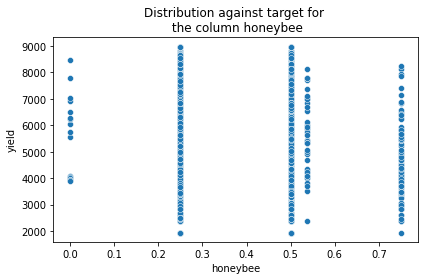

In [15]:
df = df[df.honeybee <= 1]
X = df.copy()

sns.scatterplot(data = df, x = 'honeybee', y = 'yield')
plt.title(f'Distribution against target for \n the column honeybee')
plt.xlabel('honeybee')
plt.ylabel('yield')

plt.tight_layout()
plt.show()

Notamos como mejora esta distribución de los datos comparados con el gráfico arriba (fila 1, columna 2 de los graficos).

# Valores del target

Podemos ver también por los gráficos de scatter que hay un salto discreto de valores de yield abajo. Esto puede sesgar el modelo en estos casos extremos, habría que analizar una posible remoción de estos registros.

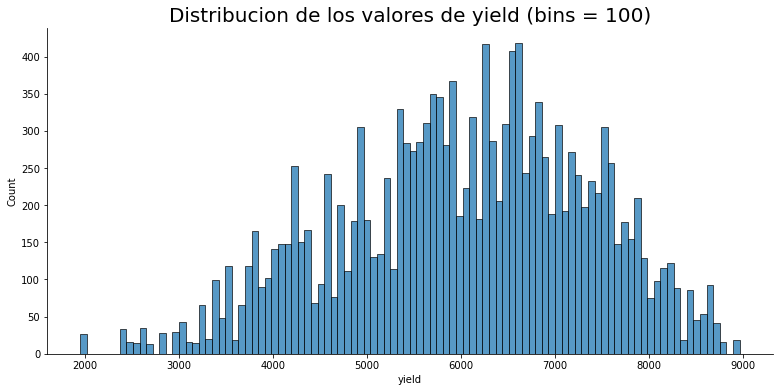

In [16]:
values = df['yield']
bins = 100

plt.figure(figsize=(13, 6))

sns.histplot(data = df, x= "yield", bins = bins)
plt.title('Distribucion de los valores de yield '+ "(bins = "+str(bins)+')', size = 20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  
plt.show()

Notamos que exagerando el numero de bins, hay un salto en el extremo inferior muy particular.
Vamos a analizar la distribución del yield con una cantidad de bins razonable, para ver si nuestra variable target tiene algun outlier significativo.

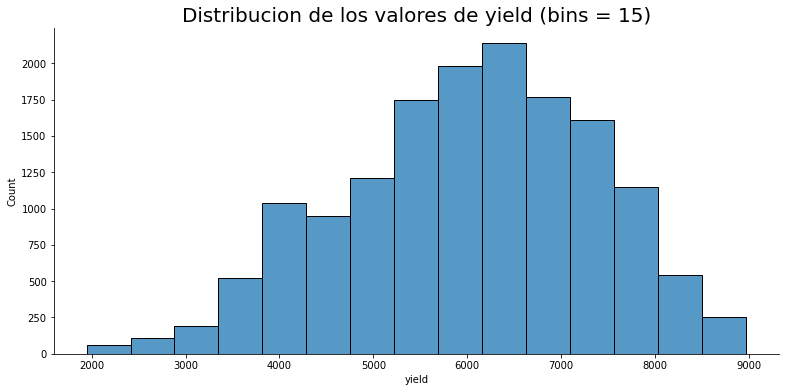

In [17]:
values = df['yield']
bins = 15

plt.figure(figsize=(13, 6))

sns.histplot(data = df, x= "yield", bins = bins)
plt.title('Distribucion de los valores de yield '+ "(bins = "+str(bins)+')', size = 20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  
plt.show()

No parece haber algun outlier. Los valores bajos deberian ser los mas dificiles de obtener, ya que el grafico esta levemente skewed hacia la derecha (asimetría negativa). Probamos aplicar alguna transformación a estos datos para lograr que sean simétricos.

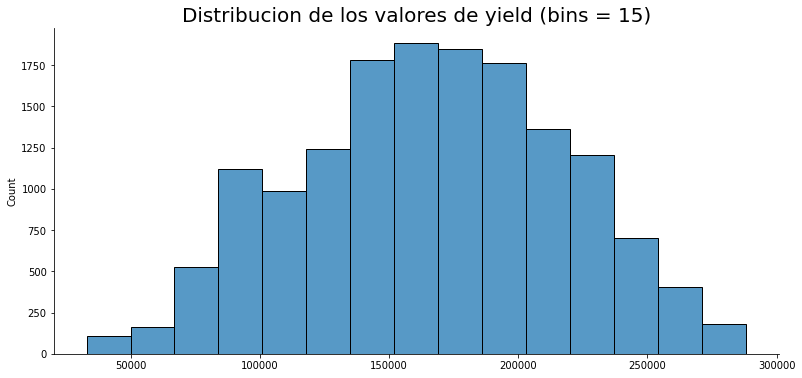

In [18]:
from scipy.stats import boxcox

values = boxcox(df['yield'])
bins = 15

plt.figure(figsize=(13, 6))

sns.histplot(data= values[0], bins = bins)
plt.title('Distribucion de los valores de yield '+ "(bins = "+str(bins)+')', size = 20)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)  
plt.show()

De esta manera parece obtener una mejor distribución normal simétrica.

# Resumen inicial

* Los valores de cada feature parecen estar mayoritariamente agrupados en distintas categorías. Se dejaron de lado algunos valores que parecian estar fuera del rango de valores admisibles

* Hay variables que parecen poder agruparse (Variables de temperatura) vamos a posteriormente aplicar un algoritmo de PCA para generar una sola columna.

* No parecen haber valores extraños de yield (rendimiento). Los datos tienen asimetría negativa. Esto puede sesgar al modelo a predecir valores mas altos.